# Maze Creater

In [4]:
import matplotlib.pyplot as plt
import random as rd
import numpy as np

#### Используемые средства:

>1. matplotlib.pyplot
>2. numpy
>3. random
>4. встроенные функции python

**Цель:** cоздание программы, коротая по указанным размерам генерирует некоторый лабиринт, который возможно пройти.

### Реализация. 

In [5]:
class MazeCreater():
    """
    There is a special class which create 
    a maze
    
    """
    def __init__(self, rows, cols):
        self.__rows = rows
        self.__cols = cols
        self.__isize = rows * 3 + (rows + 1) * 2
        self.__jsize = cols * 3 + (cols + 1) * 2
        self.__maze = np.zeros((self.__isize, self.__jsize, 3), dtype=np.int32)
        self.__ibrash = 0
        self.__jbrash = 0
        self.__visited = []
        self.__rand = []
        
    def __set_start_position(self):
        """
        This function sets start position in
        the bottom of maze
        
        """
        i = self.__maze.shape[0] - 4
        j = rd.randint(1, self.__cols) * 5 - 2
        
        self.__maze[self.__isize - 2 : self.__isize, j - 1 : j + 2] = [255, 255, 255]
        
        return [i, j]
    
    def __set_finish_position(self):
        """
        This function sets finish position in
        the upper part of maze
        
        """

        j = rd.randint(1, self.__cols) * 5 - 2
        
        self.__maze[0: 2, j - 1 : j + 2] = [255, 255, 255]
    
    def __set_random_position(self):
        """
        This funtion choise one of untreated area and
        set brush to it
        
        """
        
        i = rd.randint(0, len(self.__rand) - 1)
        
        self.__ibrash, self.__jbrash = self.__rand[i]
        self.__rand.pop(i)
    
    def __find_directions(self):
        """
        This function find possible directions
        in which brash can be moved
        
        """
        
        i, j = self.__ibrash, self.__jbrash
        shape = self.__maze.shape[:2]
        directions = []
        
        if (i - 5 < shape[0]) and (i - 5 >= 0):
            if not([i - 5, j] in self.__visited):
                directions.append('up')
            
        if (i + 5 < shape[0]) and (i + 5 >= 0):
            if not([i + 5, j] in self.__visited):
                directions.append('down')
            
        if (j - 5 < shape[1]) and (j - 5 >= 0):
            if not([i, j - 5] in self.__visited):
                directions.append('left')
            
        if (j + 5 < shape[1]) and (j + 5 >= 0):
            if not([i, j + 5] in self.__visited):
                directions.append('right')
            
        return directions
    
    def __move_brash(self, directions):
        """
        This function move brash
        
        """
        
        direction = rd.choice(directions)
        
        if len(directions) > 1:
            self.__rand.append([self.__ibrash, self.__jbrash])
        
        i, j = self.__ibrash, self.__jbrash
        
        if direction == 'up':
            self.__maze[i - 3 : i - 1, j - 1 : j + 2] = [255, 255, 255]
            
            self.__ibrash, self.__jbrash = i - 5, j
            
        elif direction == 'down':
            self.__maze[i + 2 : i + 4, j - 1 : j + 2] = [255, 255, 255]
            
            self.__ibrash, self.__jbrash = i + 5, j
            
        elif direction == 'left':
            self.__maze[i - 1 : i + 2, j - 3 : j - 1] = [255, 255, 255]
            
            self.__ibrash, self.__jbrash = i, j - 5
            
        elif direction == 'right':
            self.__maze[i - 1 : i + 2, j + 2 : j + 4] = [255, 255, 255]
            
            self.__ibrash, self.__jbrash = i, j + 5
            
        self.__visited.append([self.__ibrash, self.__jbrash])
        
    def __fill(self):
        """
        This function set white color in 
        the current area
        
        """
        
        i, j = self.__ibrash, self.__jbrash
        self.__maze[i - 1 : i + 2, j - 1 : j + 2] = [255, 255, 255]
            
    def build_maze(self):
        """
        This function build maze
        
        """
        
        self.__visited = [self.__set_start_position()]
        self.__rand.append(self.__visited[0])
        
        self.__set_finish_position()
        
        while (len(self.__visited)) != (self.__rows * self.__cols):
            self.__set_random_position()
            
            self.__fill()
            
            directions = self.__find_directions()
            
            while len(directions) != 0:
                self.__move_brash(directions)
                
                self.__fill()
                
                directions = self.__find_directions()
                
        return self.__maze

### Пример работы программы. 

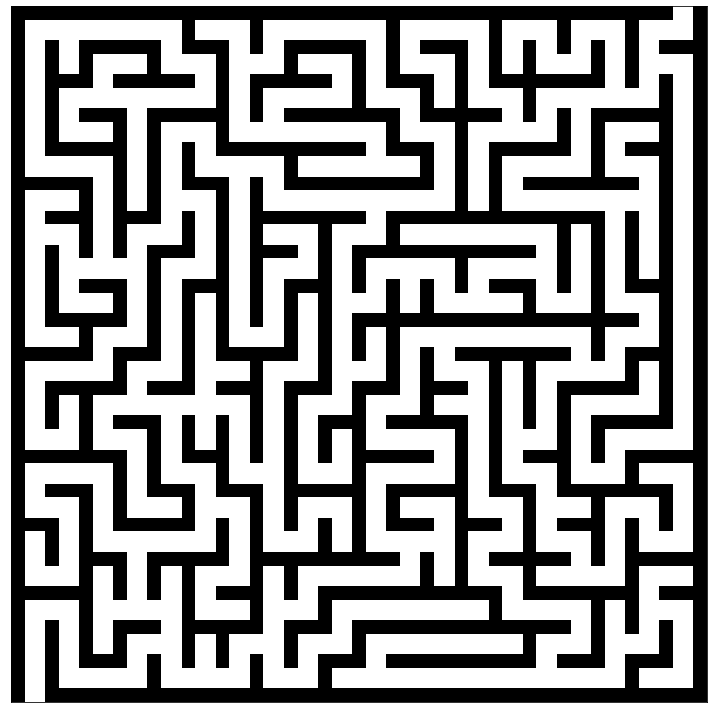

In [10]:
fig, ax = plt.subplots(figsize=(12.8, 12.8))

maze = MazeCreater(20, 20).build_maze()

ax.set_xticks([])
ax.set_yticks([])

plt.imshow(maze)

plt.show()